In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bokeh
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,6]
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin-jobs/final_data.csv


In [35]:
df = pd.read_csv('/kaggle/input/linkedin-jobs/final_data.csv')

# Display the first 5 rows of the DataFrame
print("====================== First 5 Rows ======================")
print(df.head())

# Display statistical summary for numerical columns
print("====================== Statistical Summary ======================")
print(df.describe())

# Display the names of columns in the DataFrame
print("====================== Column Names ======================")
print(df.columns)

print("====================== Table schema ======================")
print(df.info())


====================== First 5 Rows ======================
  Company_Name    Class      Designation      Location  Total_applicants  \
0        Wipro  Class 3  Project Manager   Maharashtra                 0   
1        Wipro  Class 3  Project Manager         Delhi               121   
2        Wipro  Class 3  Project Manager         Delhi                 0   
3        Wipro  Class 3    Administrator     Telangana                 0   
4        Wipro  Class 3  Project Manager   Maharashtra               119   

   LinkedIn_Followers       Level        Involvement  Employee_count  \
0             6737300  Full-time         Entry level           10001   
1             6737300  Full-time         Entry level           10001   
2             6737300  Full-time         Entry level           10001   
3             6737300  Full-time    Mid-Senior level           10001   
4             6737300  Full-time         Entry level           10001   

                         Industry  ...  REACTJS  AI

In [36]:
#Information on company :
unique_company=df['Company_Name'].unique()
most_frequent_company=df['Company_Name'].value_counts().idxmax()
least_frequent_company=df['Company_Name'].value_counts().idxmin()



print("====================== Most Frequent Company ======================")
print("The company that appears most frequently is:", unique_company)


print("====================== Most Frequent Company ======================")
print("The company that appears most frequently is:", most_frequent_company)

print("====================== Least Frequent Company ======================")
print("The company that appears least frequently is:", least_frequent_company)





====================== Most Frequent Company ======================
The company that appears most frequently is: ['Wipro' 'LTIMindtree' 'IDESLABS PRIVATE LIMITED' 'Cactus Communications'
 'ACURA SOLUTIONS LTD' 'UST' 'Vodafone Idea Limited'
 'Tata Consultancy Services' 'Uplers' 'Infosys' 'Genpact']
====================== Most Frequent Company ======================
The company that appears most frequently is: IDESLABS PRIVATE LIMITED
====================== Least Frequent Company ======================
The company that appears least frequently is: UST


In [37]:
# Finding the company with the most & least followers on LinkedIn
index_most_followers = df['LinkedIn_Followers'].idxmax()
num_followers_most_followers = df.loc[index_most_followers, 'LinkedIn_Followers']
index_least_followers = df['LinkedIn_Followers'].idxmin()
num_followers_min_followers = df.loc[index_least_followers, 'LinkedIn_Followers']


# Finding the company with the most & least employees
index_most_employees = df['Employee_count'].idxmax()
num_max_employees_count = df.loc[index_most_employees,'Employee_count']
index_least_employees = df['Employee_count'].idxmin()
num_min_employees_count = df.loc[index_least_employees,'Employee_count']

# Retrieving the company names based on the indices found
company_most_followers = df.loc[index_most_followers, 'Company_Name']
company_least_followers = df.loc[index_least_followers, 'Company_Name']
company_most_employees = df.loc[index_most_employees, 'Company_Name']
company_least_employees = df.loc[index_least_employees, 'Company_Name']

# Displaying the results
print("====================== Companies with Most and Least Followers ======================")
print(f"The company with the most followers is: {company_most_followers}")
print(f"Number of followers: {format(num_followers_most_followers, ',' )}")

print(f"The company with the least followers is: {company_least_followers}")
print(f"Number of followers: {format(num_followers_min_followers, ',' )}")


print("====================== Companies with Most and Least Employees ======================")
print(f"The company with the most employees is: {company_most_employees}")
print(f"Number of employees: {format(num_max_employees_count, ',' )}")
print(f"The company with the least employees is: {company_least_employees}")
print(f"Number of employees: {format(num_min_employees_count, ',' )}")


====================== Companies with Most and Least Followers ======================
The company with the most followers is: Tata Consultancy Services
Number of followers: 11,996,967
The company with the least followers is: ACURA SOLUTIONS LTD
Number of followers: 11,245
====================== Companies with Most and Least Employees ======================
The company with the most employees is: Wipro
Number of employees: 10,001
The company with the least employees is: ACURA SOLUTIONS LTD
Number of employees: 110


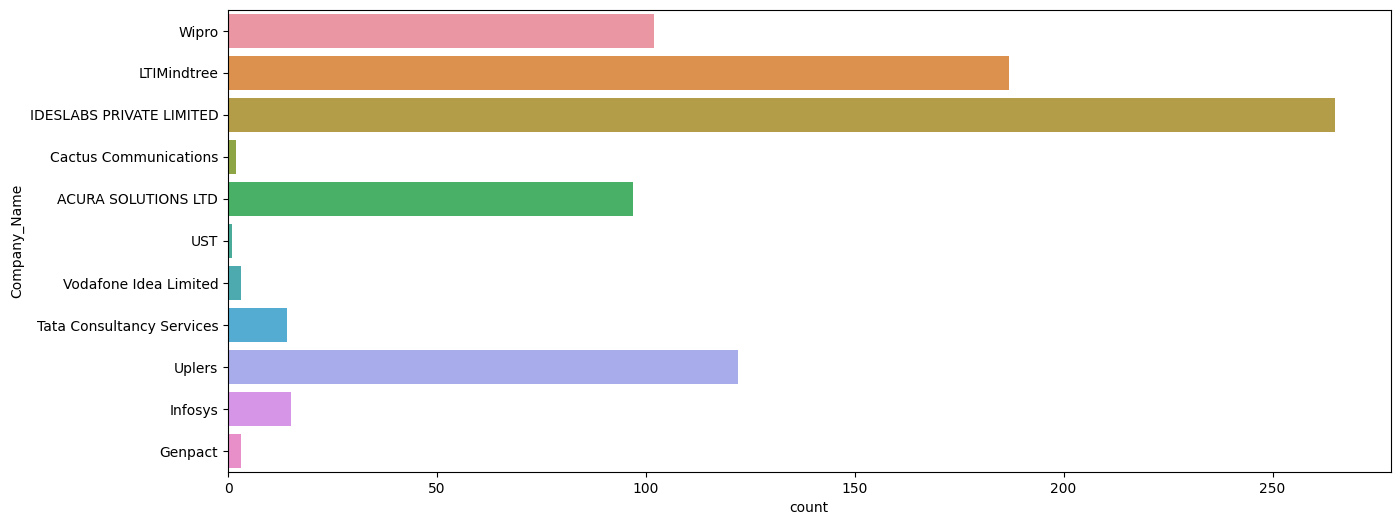

In [38]:
#count the number of time appear each company name in the dataset 
sns.countplot(y='Company_Name',data=df)
plt.show()

In [39]:
skills = df[['PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML']]

In [40]:
sk=[]
for i in skills.columns:
    sk.append(skills[i].value_counts()[1])

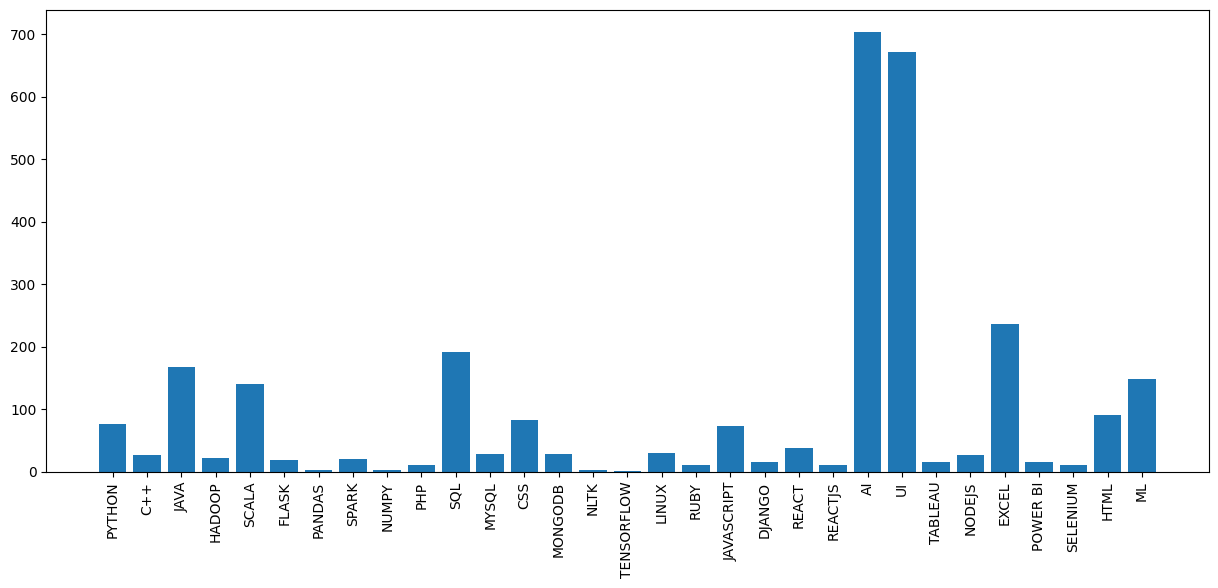

In [41]:
# to add title ,legend , color difference
plt.bar(skills.columns,sk)
plt.xticks(rotation=90)
plt.show()

In [43]:
# Initialize the figure
fig = go.Figure()

# Function to update the data
def update_data():
    # Count the occurrences of each level
    level_count = df['Level'].value_counts()
    
    # Labels for each section
    labels = level_count.index.tolist()
    
    # Values for each section
    values = level_count.values.tolist()
    
    # Update the figure data
    fig.data = []
    fig.add_trace(go.Pie(labels=labels, values=values, hole=.3))

# First update to initialize the data
update_data()

# Layout settings
fig.update_layout(
    title="Full Time vs Contract",
    updatemenus=[{}]
)

# Add frames for animation (for demonstration, we'll just alternate between the original data and a modified one)
frames = []

# Original data
update_data()
frames.append(go.Frame(data=fig.data))


fig.frames = frames

# Show the figure
fig.show()



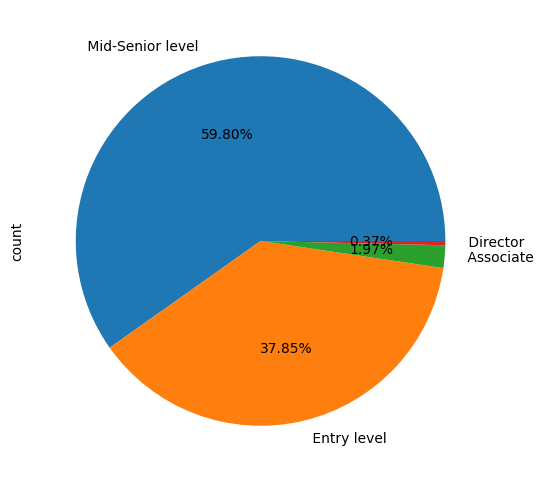

In [44]:
df['Involvement'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

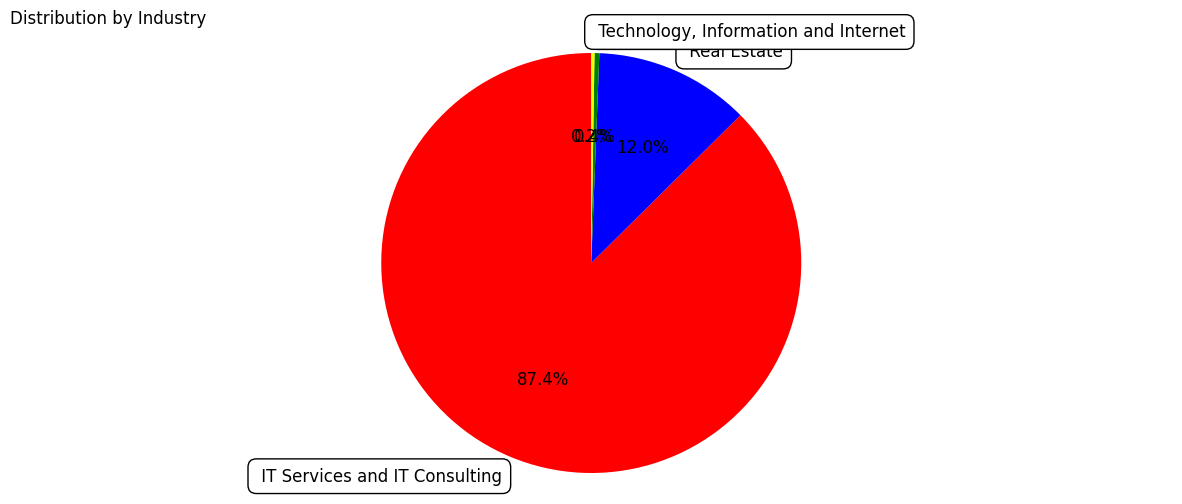

In [49]:
# Count the occurrences of each industry
industry_count = df['Industry'].value_counts()

# Labels for each section
labels = industry_count.index

# Values for each section
sizes = industry_count.values

# Custom Colors for each section
colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Create the pie chart
fig, ax = plt.subplots()

# Plot pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Beautify labels and texts
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    autotext.set_fontsize(12)
    # You can also use bbox to set background color, transparency, etc.
    text.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

# Add title
plt.title('Distribution by Industry',loc='left')



# Show the plot
plt.show()

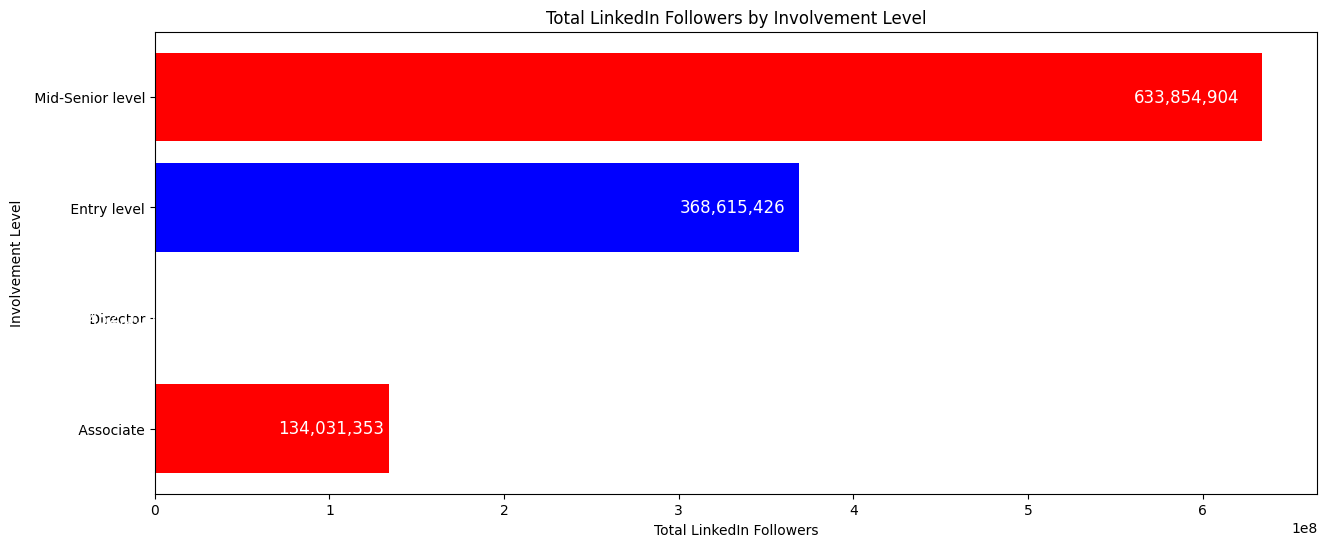

In [56]:
# Group by 'Involvement' and sum the 'LinkedIn_Followers'
grouped_data = df.groupby('Involvement')['LinkedIn_Followers'].sum()

# Create the improved bar chart using Matplotlib
fig, ax = plt.subplots()

# Customize the color of the bars
colors = ['red', 'green', 'blue']

# Plot horizontal bar chart
bars = ax.barh(grouped_data.index, grouped_data.values, color=colors)
for bar in bars:
    plt.text(bar.get_width() - (0.02 * bar.get_width()), bar.get_y() + bar.get_height()/2, 
             '{:,}'.format(int(bar.get_width())),  # Using comma as a thousand separator
             va='center', 
             ha='right', 
             color='white', 
             fontsize=12)

# Add labels and title
ax.set_xlabel('Total LinkedIn Followers')
ax.set_ylabel('Involvement Level')
plt.title('Total LinkedIn Followers by Involvement Level')

# Show the plot
plt.show()

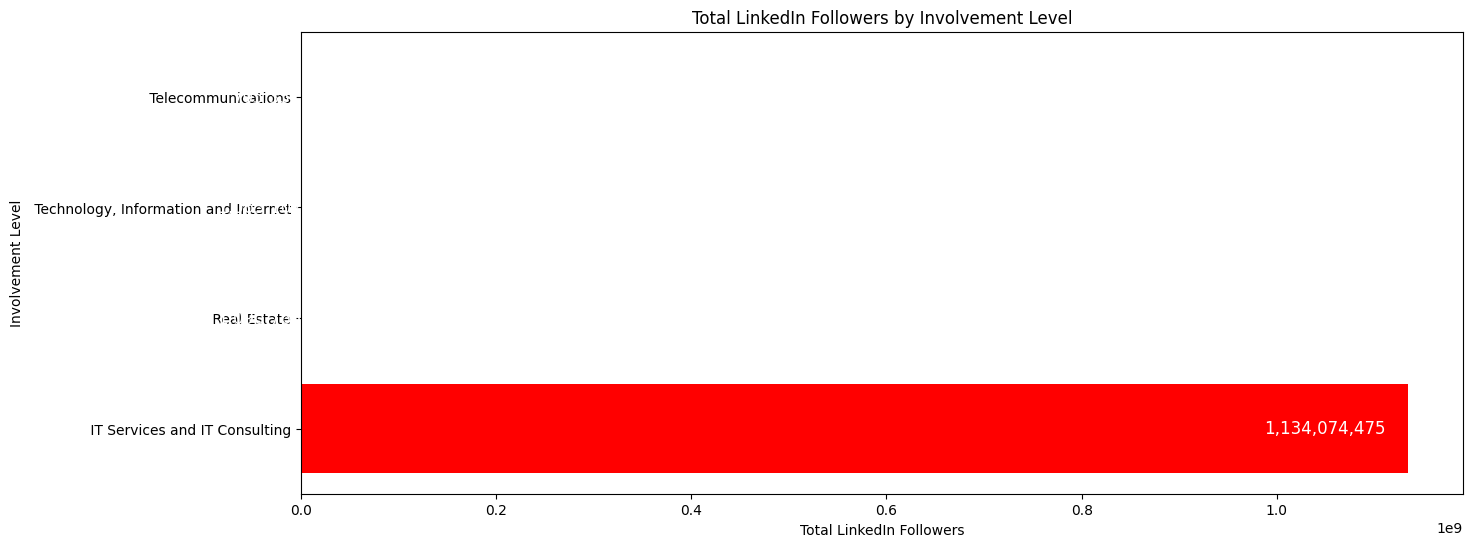

In [58]:
grouped_data = df.groupby('Industry')['LinkedIn_Followers'].sum()

# Create the improved bar chart using Matplotlib
fig, ax = plt.subplots()

# Customize the color of the bars
colors = ['red', 'green', 'blue']

# Plot horizontal bar chart
bars = ax.barh(grouped_data.index, grouped_data.values, color=colors)
for bar in bars:
    plt.text(bar.get_width() - (0.02 * bar.get_width()), bar.get_y() + bar.get_height()/2, 
             '{:,}'.format(int(bar.get_width())),  # Using comma as a thousand separator
             va='center', 
             ha='right', 
             color='white', 
             fontsize=12)

# Add labels and title
ax.set_xlabel('Total LinkedIn Followers')
ax.set_ylabel('Involvement Level')
plt.title('Total LinkedIn Followers by Involvement Level')

# Show the plot
plt.show()